<a href="https://colab.research.google.com/github/KeonhoChu/Mini_Projects/blob/main/Health_Insurance_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


ins = pd.read_csv('/content/drive/MyDrive/medical cost presonal datasets/insurance.csv')

In [ ]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
ins.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
ins[ins['smoker']=='yes']

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [ ]:
ins[ins['smoker']=='no']

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: xlabel='charges', ylabel='bmi'>

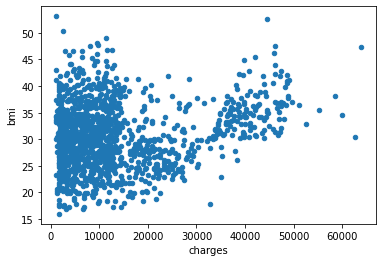

In [ ]:
ins.plot(kind='scatter',x='charges',y='bmi')

<Axes: xlabel='age', ylabel='bmi'>

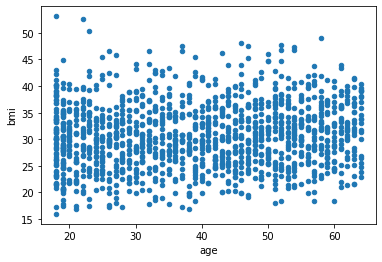

In [ ]:
ins.plot(kind='scatter',x='age',y='bmi')

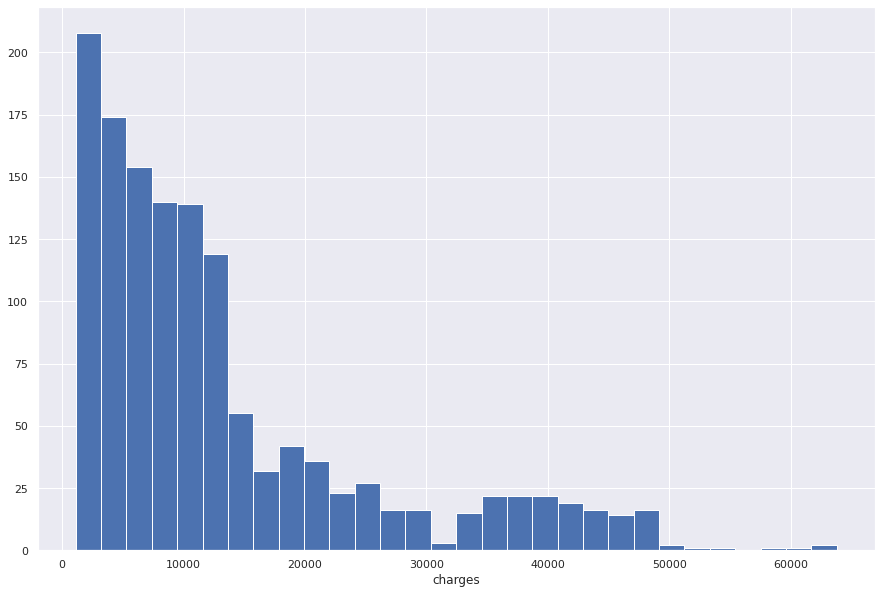

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
plt.hist(ins['charges'], bins=30)
plt.xlabel("charges")
plt.show()

<Axes: >

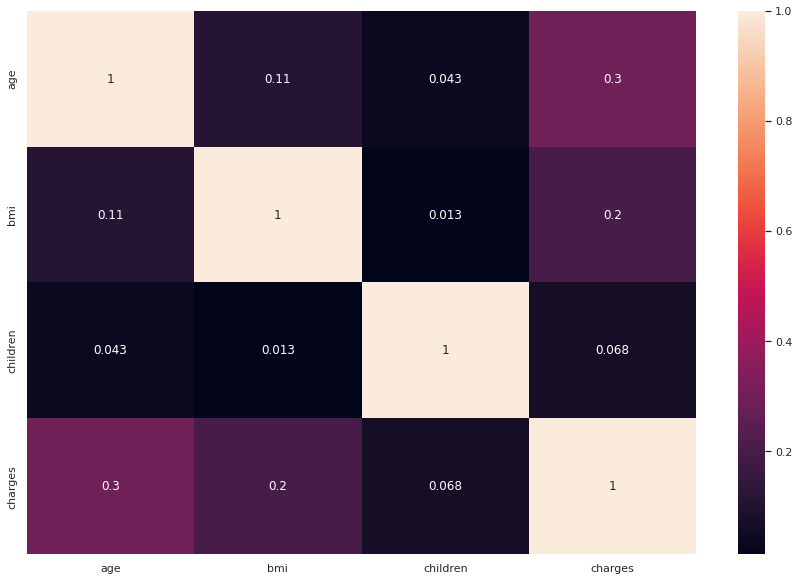

In [ ]:
correlation_matrix = ins.corr().round(4)
sns.heatmap(data=correlation_matrix, annot=True)

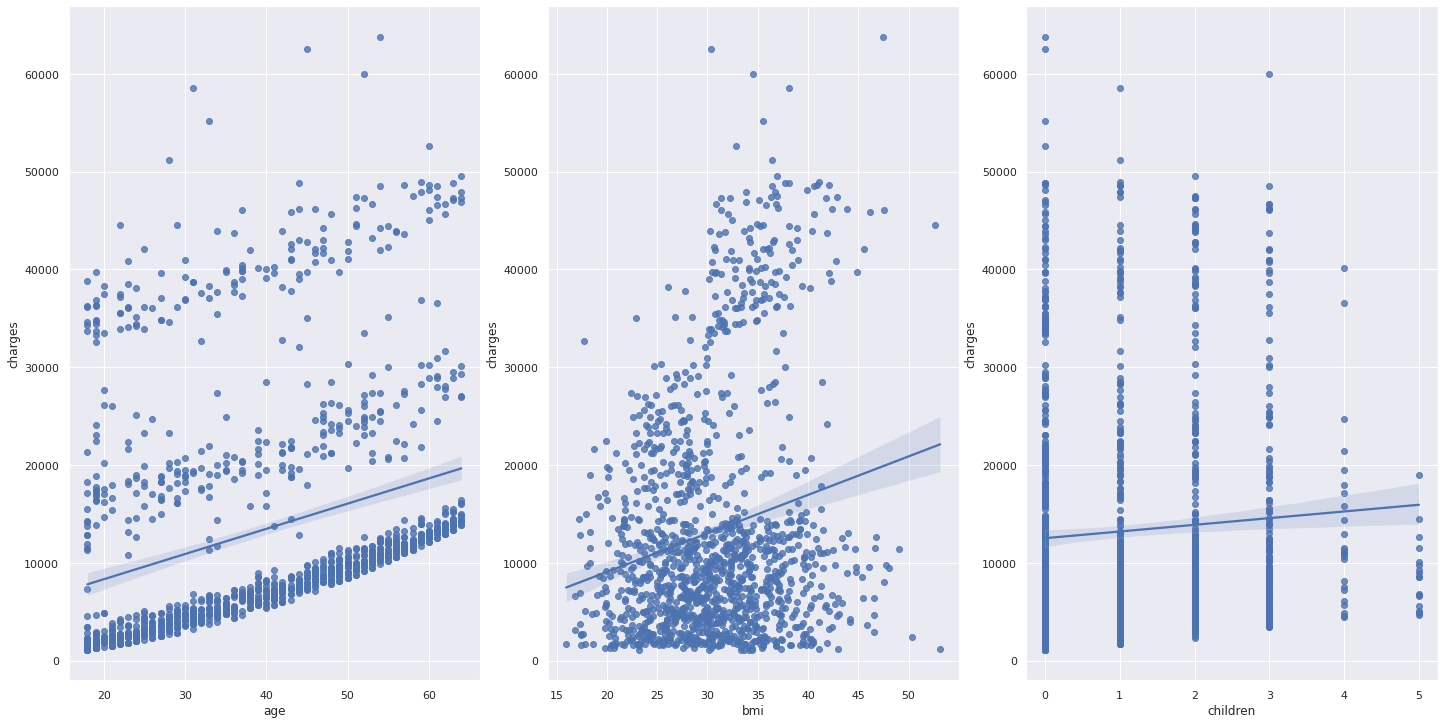

In [ ]:
column_sels = ['age','bmi','children']
x = ins.loc[:,column_sels]
y = ins['charges']
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

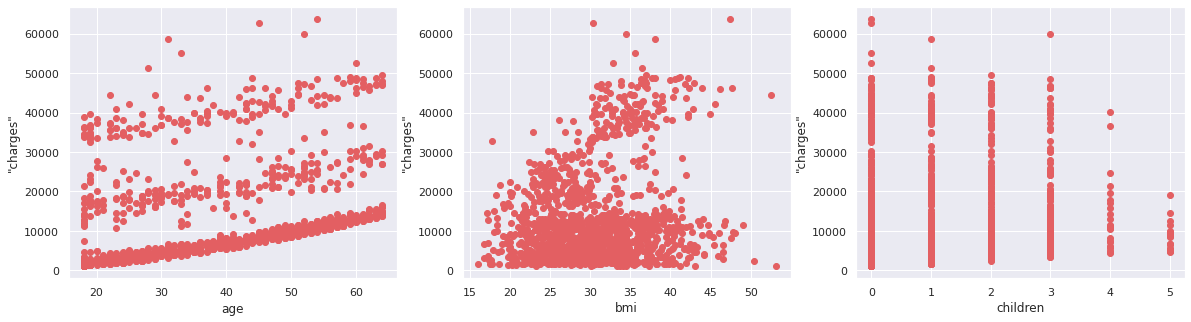

In [ ]:
plt.figure(figsize=(20, 5))

features = ['age', 'bmi','children']
target = ins['charges']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x=ins[col]
    y = target
    plt.scatter(x, y, marker='o',color='#e35f62')
    plt.title("")
    plt.xlabel(col)
    plt.ylabel('"charges"')

In [ ]:
import plotly.express as px
df = ins
fig = px.scatter(df, x="charges", y='bmi', color="region", symbol="region")
fig.show()

In [ ]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
ins_test_data = [ins]

In [ ]:
for dataset in ins_test_data:
  dataset.loc[dataset['age'] <10, 'age'] = 0
  dataset.loc[(dataset['age'] >= 11) & (dataset['age'] < 20), 'age'] = 1
  dataset.loc[(dataset['age'] >= 21) & (dataset['age'] < 30), 'age'] = 2
  dataset.loc[(dataset['age'] >= 31) & (dataset['age'] < 40), 'age'] = 3
  dataset.loc[(dataset['age'] >= 41) & (dataset['age'] < 50), 'age'] = 4
  dataset.loc[(dataset['age'] >= 51) & (dataset['age'] < 60), 'age'] = 5
  dataset.loc[(dataset['age'] >= 61), 'age'] = 6
  dataset['age'] = dataset['age'].map({0: 'a', 1:' 10', 2:'20', 3:'30', 4:'40',5:'50',6:'old'})

In [ ]:
sex_mapping ={'male':0, 'female':1}
for dataset in ins_test_data:
    dataset['sex'] = dataset['sex'].map(sex_mapping)

IndentationError: ignored

In [ ]:
smoker_mapping ={'no':0, 'yes':1}.ins['smoker'] = ins['smoker'].map(smoker_mapping)

NameError: ignored

In [ ]:
children_mapping ={'0':0, '1':1,'2':2,'2':3,'4':4,'5':5}
for dataset in ins_test_data:
    dataset['children'] = dataset['children'].map(children_mapping)

In [ ]:
region_mapping ={'southwest':0, 'northwest':1,'southeast':2,'northeast':3}
for dataset in ins_test_data:
    dataset['region'] = dataset['region'].map(region_mapping)

In [ ]:
ins["sex"] = ins["sex"].astype('category')
ins["sex"] = ins["sex"].cat.codes
ins["smoker"] = ins["smoker"].astype('category')
ins["smoker"] = ins["smoker"].cat.codes
ins["region"] = ins["region"].astype('category')
ins["region"] = ins["region"].cat.codes
ins.head()
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


<Axes: >

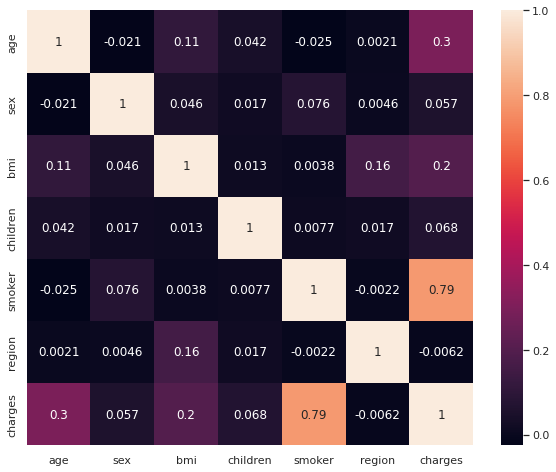

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(ins.corr(), annot = True)